## Feature Engineering

Will bring together various techniques for feature engineering.
This would give you an idea of the end-to-end pipeline to build machine learning algorithms.

will:
- build a lasso
- use feature-engine for the feature engineering steps
- set up an entire engineering and prediction pipeline using a Scikit-learn Pipeline

===================================================================================================



We will use the House Prices dataset.

In [1]:
!pip install feature_engine

## House Prices dataset

In [2]:
import warnings 
warnings.filterwarnings('ignore')

from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

pd.pandas.set_option('display.max_columns', None)

In [ ]:
'''
Download dataset
'''
!wget = https://hr-projects-assets-prod.s3.amazonaws.com/cnjqbce2gfg/ba26e5aee7029d68d6adc1ab20cf3c54/houseprice.csv

### Load Datasets

In [3]:
'''
load dataset, file : houseprice.csv
'''

data = pd.read_csv('houseprice.csv')

### Types of variables 

Go ahead and find out what types of variables there are in this dataset

In [7]:
'''
inspect the type of variables
'''
data.shape

(1460, 81)

There are a mixture of categorical and numerical variables. Numerical are those of type **int** and **float** and categorical those of type **object**.

Id is a unique identifier for each of the houses. Thus this is not a variable that we can use.

#### Find categorical variables

In [6]:
'''
find categorical variables
'''
print(data.select_dtypes(include=['object']).columns.tolist())
categorical = data.select_dtypes(include=['object']).columns.tolist()

print('There are {} categorical variables'.format(len(categorical)))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
There are 43 categorical variables


In [8]:
data[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Find temporal variables

There are a few variables in the dataset that are temporal. They indicate the year in which something happened. We shouldn't use these variables straightaway for model building. We should instead transform them to capture some sort of time information. Let's inspect these temporal variables:


In [89]:
'''
make a list of the numerical variables first
'''

numerical = data.select_dtypes(exclude=['object']).columns.tolist()
print(len(numerical))
'''
list of variables that contain year information
'''
df_years=(data.filter(regex=("Year.*|Yr.*")))
year_vars = list(df_years.columns)

year_vars

38


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [90]:
data[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


We can see that these variables correspond to the years in which the houses were built or remodeled or a garage was built, or the house was indeed sold. It would be better if we captured the time elapsed between the time the house was built and the time the house was sold for example. We are going to do that in the feature engineering section later. 

We have another temporal variable: MoSold, which indicates the month in which the house was sold. Let's inspect if the house price varies with the time of the year in which it is sold:

<AxesSubplot:xlabel='MoSold'>

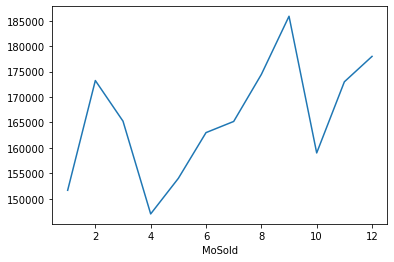

In [91]:
'''
plot median house price per month in which it was sold
'''

df_mo=data.groupby(by='MoSold').median()['SalePrice']
df_mo.plot()

### Q1 . Dose the price seems to vary depending on the month in which the house is sold?

    A. No
    B. Yes
    
    assgin A or B to q1.

In [92]:
# Replace "X" with A or B
q1 = str("B")

In [93]:
'''
Please run this cell to to, submit your option for evalutaion
'''

file=open("submit0.txt","w+")

s0=q1
file.write(s0)
file.write("\n")
file.close()

#### Find discrete variables

To identify discrete variables, we will select from all the numerical ones, those that contain a finite and small number of distinct values.

In [94]:
'''
visualise the values of the discrete variables
'''
#data[numerical].plot(subplots=True, layout=(4,5))
discrete = []
for i in numerical:
    count=len(data[i].unique())
    if (count <= 40):
        discrete.append(i)
        print(i,count)

print(discrete)
# Code

print('There are {} discrete variables'.format(len(discrete)))

MSSubClass 15
OverallQual 10
OverallCond 9
LowQualFinSF 24
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageCars 5
3SsnPorch 20
PoolArea 8
MiscVal 21
MoSold 12
YrSold 5
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
There are 18 discrete variables


#### Continuous variables

In [95]:
'''
find continuous variables
let's remember to skip the Id variable and the target variable SalePrice
which are both also numerical'''
number_columns=numerical
numerical = []
for i in number_columns:
    if (i != 'Id') & (i!='SalePrice'):
        count=len(data[i].unique())
        if (count > 40):
            numerical.append(i)
            print(i,count)
print('There are {} numerical and continuous variables'.format(len(numerical)))

LotFrontage 111
LotArea 1073
YearBuilt 112
YearRemodAdd 61
MasVnrArea 328
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
GrLivArea 861
GarageYrBlt 98
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
ScreenPorch 76
There are 18 numerical and continuous variables


    Now we have inspected and have a view of the different types of variables that we have in the house price dataset. 
    Let's move on to understand the types of problems that these variables have.

### Types of problems within the variables

#### Missing values

In [102]:
'''
Find variables with NA and the percentage of NA
'''
data.columns[data.isnull().any()]
data.isnull().mean() * 100
# Code

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

#### Outliers and distributions

{'whiskers': [<matplotlib.lines.Line2D at 0x118d903cb50>,
 'caps': [<matplotlib.lines.Line2D at 0x118d9b99790>,
 'boxes': [<matplotlib.lines.Line2D at 0x118d903c580>,
 'medians': [<matplotlib.lines.Line2D at 0x118d9b991c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x118d5527910>,
 'means': []}

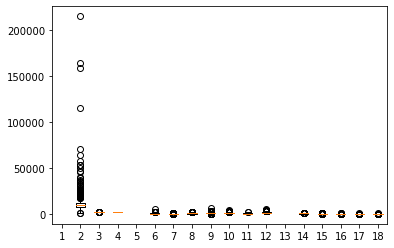

In [106]:
'''
let's make boxplots to visualise outliers in the continuous variables 
and histograms to get an idea of the distribution
'''
plt.boxplot(data[numerical])
#code

#### Outliers in discrete variables

Now, let's identify outliers in the discrete variables.
**Discrete variables can be pre-processed / engineered as if they were categorical**. 

In [ ]:
'''
outlies in discrete variables
'''

# Code

### Monotonicity between discrete variables and target values

In [ ]:
'''
plot the median sale price per value of the discrete
variable
'''


Some of the discrete variables show some sort of monotonic relationship and some don't.

#### Number of labels: cardinality

Let's go ahead now and examine the cardinality of our categorical variables. That is, the number of different labels.

In [ ]:
'''
plot number of categories per categorical variable
'''

# Code

Most of the variables, contain only a few labels. Then, we do not have to deal with high cardinality.

### Separate train and test set

In [107]:
'''
Split data into train and test set
'''

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape

((1168, 79), (292, 79))

**Now we will move on and engineer the features of this dataset. The most important part for this course.**

### Temporal variables 

First, we will create those temporal variables.

In [108]:
'''
function to calculate elapsed time
'''

def elapsed_years(df, var):
    # capture difference between year variable and
    # year the house was sold
    
    df[var] = df['YrSold']-df[var]
    return df

In [109]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)
    

In [110]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
254,53,53,53.0
1066,16,15,16.0
638,98,58,NaN
799,70,57,68.0
380,86,60,86.0


Instead of the "year", now we have the amount of **years that passed** since the house was built or remodeled and the house was sold. Next, we drop the YrSold variable from the datasets, because we already extracted its value.

In [111]:
'''
drop YrSold
'''
data=data.drop('YrSold',axis=1)

In [112]:
'''
capture the column names for later use in the notebook
'''
final_columns = X_train.columns

### Missing data imputation
#### Continuous variables

In [ ]:
'''
print variables with missing data
keep in mind that now that we created those new temporal variables, we
are going to treat them as numerical and continuous:
'''

'''
remove YrSold from the variable list
because it is no longer in our dataset
'''


'''
examine percentage of missing values
'''


In [ ]:
'''
print variables with missing data
'''



In [113]:
'''
will treat discrete variables as if they were categorical
to treat discrete as categorical using Feature-engine
we need to re-cast them as object
'''
X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

## Putting it all together

Create pipeline using following parameter

   ### Pipeline
    
       # missing data imputation
       
       AddMissingIndicator : varibales = 'LotFrontage', 'MasVnrArea',  'GarageYrBlt'
       MeanMedianImputer   : imputation_method='median',
                              variables= 'LotFrontage', 'MasVnrArea',  'GarageYrBlt'
       CategoricalImputer  : variables= categorical
       
       
       # categorical encoding
       
       RareLabelEncoder    : tol=0.05, n_categories=6, variables= categorical+discrete
       OrdinalEncoder      : encoding_method='ordered', variables=categorical+discrete
       
       # discretisation + encoding 
       
       EqualFrequencyDiscretiser : q=5, return_object=True, variables=numerical
       OrdinalEncoder      : encoding_method='ordered', variables=numerical
       
       # feature Scaling
       StandardScaler
       
       # regression
       Lasso : random_state=42

In [162]:
'''
Create Pipeline
'''
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.imputation import MeanMedianImputer,CategoricalImputer
from feature_engine.imputation import AddMissingIndicator
from feature_engine.discretisation import EqualFrequencyDiscretiser
house_pipe = Pipeline([

    # missing data imputation
    #Code
    ('AddMissingIndicator',AddMissingIndicator(variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('MeanMedianImputer',MeanMedianImputer(imputation_method='median',variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('CategoricalImputer',CategoricalImputer(variables=categorical)),
    # categorical encoding - 
    #Code
    ('RareLabelEncoder',RareLabelEncoder(tol=0.05, n_categories=6, variables= categorical+discrete)),
    ('OrdinalEncoder',OrdinalEncoder(encoding_method='ordered',variables=categorical+discrete)),
    # discretisation + encoding 
    #Code
    ('EqualFrequencyDiscretiser',EqualFrequencyDiscretiser(q=5, return_object=True, variables=numerical)),
    ('OrdinalEncoderNeu',OrdinalEncoder(encoding_method='ordered',variables= numerical)),
    # feature Scaling    
    #Code
    ('StandardScaler', StandardScaler()),
    # regression
    #Code
    ('lasso', Lasso(random_state=42))
])

In [163]:
'''
fit the pipeline
'''
house_pipe.fit(X_train, y_train)
house_pipe.fit(X_test, y_test)

# let's get the predictions
X_test_preds = house_pipe.predict(X_test)

In [164]:
# a peek into the prediction values
X_test_preds

array([161274.15750587, 328511.5655462 , 116979.32328234, 157413.62311033,
       308714.52256482,  86002.17335696, 279353.73439913, 132013.0459786 ,
        84924.03433084, 117768.01789057, 155700.19535474, 119204.08541645,
        95500.21027671, 213633.31346218, 144295.7558448 , 134167.67371074,
       189579.18471777, 132957.70264995, 144906.0333015 , 233774.60590102,
       172042.91685671, 194950.34551943, 172558.70096417, 114697.23199633,
       235981.15751396, 176479.190765  , 221554.74663638, 128156.34885782,
       187495.8887112 , 197072.55999463, 114927.47274377, 290960.17472399,
       230784.13648296, 107490.04296859, 263868.29551551, 137496.79071831,
       116921.53449084, 195918.29381932, 262541.53143523,  95468.29465964,
       108819.19465069, 232582.12272333, 106839.08665298, 353372.8771049 ,
       140650.95361546, 167275.99972924,  97608.43791246, 114718.24585408,
       399252.61272352, 136729.64618703, 115353.25613284, 227423.63198665,
       102390.76463241, 3

In [165]:
MSE_ = mean_squared_error(y_test, X_test_preds)
RMSE_ = sqrt(mean_squared_error(y_test, X_test_preds))
r2_ = r2_score(y_test, X_test_preds)

print('test mse: {}'.format(MSE_))
print('test rmse: {}'.format(RMSE_))
print('test r2: {}'.format(r2_))

test mse: 964464705.656653
test rmse: 31055.832071555466
test r2: 0.8742602752992505


In [166]:
'''
Please run this cell to to, submit your answer for evalutaion
'''

file=open("submit2.txt","w+")
file.write(str(RMSE_))
file.write("\n")
file.write(str(MSE_))
file.write("\n")
file.write(str(r2_))
file.write("\n")
file.close()

Text(0, 0.5, 'Predicted Price')

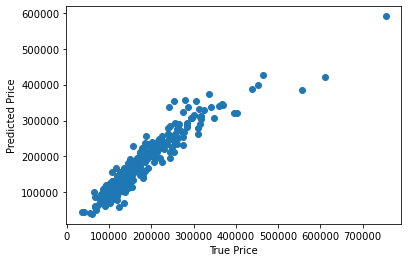

In [167]:
'''
plot predictions vs real value
'''

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

<AxesSubplot:>

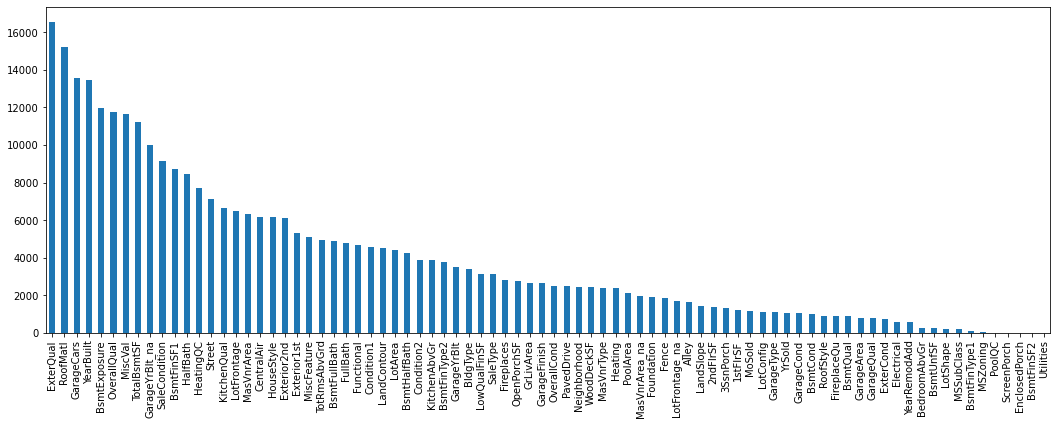

In [168]:
'''
explore the importance of the features
'''
importance = pd.Series(np.abs(house_pipe.named_steps['lasso'].coef_))
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))